In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('data/X_train.pickle', 'rb') as file:
    X_train = pickle.load(file)
    
with open('data/y_train.pickle', 'rb') as file:
    y_train = pickle.load(file)

In [6]:
y_train.value_counts()

tree
0.0     87831
1.0      5870
Name: count, dtype: int64

In [13]:
87831/5870

14.962691652470188

In [79]:
y_train.shape

(93702, 1)

In [80]:
columns_x = ['maxspeed', 'length', 'lanes', 'buildings_count', 'landuse_count',
        'natural_count', 'railways_p_count', 'roads_p_count',
        'pofw_count', 'pois_count', 'pois_p_count',
        'traffic_count', 'traffic_p_count', 'transport_p_count', 'water_count',
        'waterways_p_count','bridge', 'tunnel', 'highway_cycleway', 'highway_footway',
        'highway_other', 'highway_path', 'highway_residential',
        'highway_service', 'highway_tertiary']

In [81]:
X_train.columns = columns_x

In [82]:
X_train

maxspeed    length     lanes  buildings_count  landuse_count  \
0      0.274498  0.953368  0.018300         0.018300       0.091499   
1      0.137616  0.990425  0.005505         0.002752       0.002752   
2      0.936229  0.343315  0.037449         0.018725       0.018725   
3      0.948869  0.306409  0.037955         0.018977       0.018977   
4      0.765376  0.640115  0.030615         0.015308       0.030615   
...         ...       ...       ...              ...            ...   
93697  0.981201  0.176302  0.039248         0.019624       0.019624   
93698  0.787197  0.613478  0.031488         0.015744       0.015744   
93699  0.952081  0.296211  0.038083         0.019042       0.019042   
93700  0.829718  0.555463  0.033189         0.016594       0.016594   
93701  0.768044  0.638367  0.030722         0.015361       0.015361   

       natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
0                0.0               0.0       0.073199         0.0    0.036600   
1                0.0               0.0       0.008257         0.0    0.002752   
2                0.0               0.0       0.056174         0.0    0.018725   
3                0.0               0.0       0.056932         0.0    0.018977   
4                0.0               0.0       0.045923         0.0    0.015308   
...              ...               ...            ...         ...         ...   
93697            0.0               0.0       0.058872         0.0    0.019624   
93698            0.0               0.0       0.047232         0.0    0.015744   
93699            0.0               0.0       0.057125         0.0    0.019042   
93700            0.0               0.0       0.033189         0.0    0.016594   
93701            0.0               0.0       0.030722         0.0    0.015361   

       ...  waterways_p_count  bridge  tunnel  highway_cycleway  \
0      ...                0.0     0.0     0.0               0.0   
1      ...                0.0     0.0     0.0               0.0   
2      ...                0.0     0.0     0.0               0.0   
3      ...                0.0     0.0     0.0               0.0   
4      ...                0.0     0.0     0.0               0.0   
...    ...                ...     ...     ...               ...   
93697  ...                0.0     0.0     0.0               0.0   
93698  ...                0.0     0.0     0.0               0.0   
93699  ...                0.0     0.0     0.0               0.0   
93700  ...                0.0     0.0     0.0               0.0   
93701  ...                0.0     0.0     0.0               0.0   

       highway_footway  highway_other  highway_path  highway_residential  \
0                  0.0            0.0           0.0                  0.0   
1                  0.0            0.0           0.0                  1.0   
2                  0.0            0.0           0.0                  0.0   
3                  0.0            0.0           0.0                  0.0   
4                  1.0            0.0           0.0                  0.0   
...                ...            ...           ...                  ...   
93697              0.0            0.0           1.0                  0.0   
93698              0.0            0.0           0.0                  0.0   
93699              0.0            0.0           1.0                  0.0   
93700              0.0            0.0           0.0                  0.0   
93701              0.0            0.0           0.0                  0.0   

       highway_service  highway_tertiary  
0                  1.0               0.0  
1                  0.0               0.0  
2                  1.0               0.0  
3                  1.0               0.0  
4                  0.0               0.0  
...                ...               ...  
93697              0.0               0.0  
93698              1.0               0.0  
93699              0.0               0.0  
93700              1.0           

In [83]:
joined = X_train.join(y_train)

In [84]:
joined

maxspeed    length     lanes  buildings_count  landuse_count  \
0      0.274498  0.953368  0.018300         0.018300       0.091499   
1      0.137616  0.990425  0.005505         0.002752       0.002752   
2      0.936229  0.343315  0.037449         0.018725       0.018725   
3      0.948869  0.306409  0.037955         0.018977       0.018977   
4      0.765376  0.640115  0.030615         0.015308       0.030615   
...         ...       ...       ...              ...            ...   
93697  0.981201  0.176302  0.039248         0.019624       0.019624   
93698  0.787197  0.613478  0.031488         0.015744       0.015744   
93699  0.952081  0.296211  0.038083         0.019042       0.019042   
93700  0.829718  0.555463  0.033189         0.016594       0.016594   
93701  0.768044  0.638367  0.030722         0.015361       0.015361   

       natural_count  railways_p_count  roads_p_count  pofw_count  pois_count  \
0                0.0               0.0       0.073199         0.0    0.036600   
1                0.0               0.0       0.008257         0.0    0.002752   
2                0.0               0.0       0.056174         0.0    0.018725   
3                0.0               0.0       0.056932         0.0    0.018977   
4                0.0               0.0       0.045923         0.0    0.015308   
...              ...               ...            ...         ...         ...   
93697            0.0               0.0       0.058872         0.0    0.019624   
93698            0.0               0.0       0.047232         0.0    0.015744   
93699            0.0               0.0       0.057125         0.0    0.019042   
93700            0.0               0.0       0.033189         0.0    0.016594   
93701            0.0               0.0       0.030722         0.0    0.015361   

       ...  bridge  tunnel  highway_cycleway  highway_footway  highway_other  \
0      ...     0.0     0.0               0.0              0.0            0.0   
1      ...     0.0     0.0               0.0              0.0            0.0   
2      ...     0.0     0.0               0.0              0.0            0.0   
3      ...     0.0     0.0               0.0              0.0            0.0   
4      ...     0.0     0.0               0.0              1.0            0.0   
...    ...     ...     ...               ...              ...            ...   
93697  ...     0.0     0.0               0.0              0.0            0.0   
93698  ...     0.0     0.0               0.0              0.0            0.0   
93699  ...     0.0     0.0               0.0              0.0            0.0   
93700  ...     0.0     0.0               0.0              0.0            0.0   
93701  ...     0.0     0.0               0.0              0.0            0.0   

       highway_path  highway_residential  highway_service  highway_tertiary  \
0               0.0                  0.0              1.0               0.0   
1               0.0                  1.0              0.0               0.0   
2               0.0                  0.0              1.0               0.0   
3               0.0                  0.0              1.0               0.0   
4               0.0                  0.0              0.0               0.0   
...             ...                  ...              ...               ...   
93697           1.0                  0.0              0.0               0.0   
93698           0.0                  0.0              1.0               0.0   
93699           1.0                  0.0              0.0               0.0   
93700           0.0                  0.0              1.0               0.0   
93701           0.0                  0.0              1.0               0.0   

         0  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
93697  0.0  
93698  0.0  
93699  1.0  
93700  0.0  
93701  0.0  

[93702 rows x 26 columns]

<Axes: >

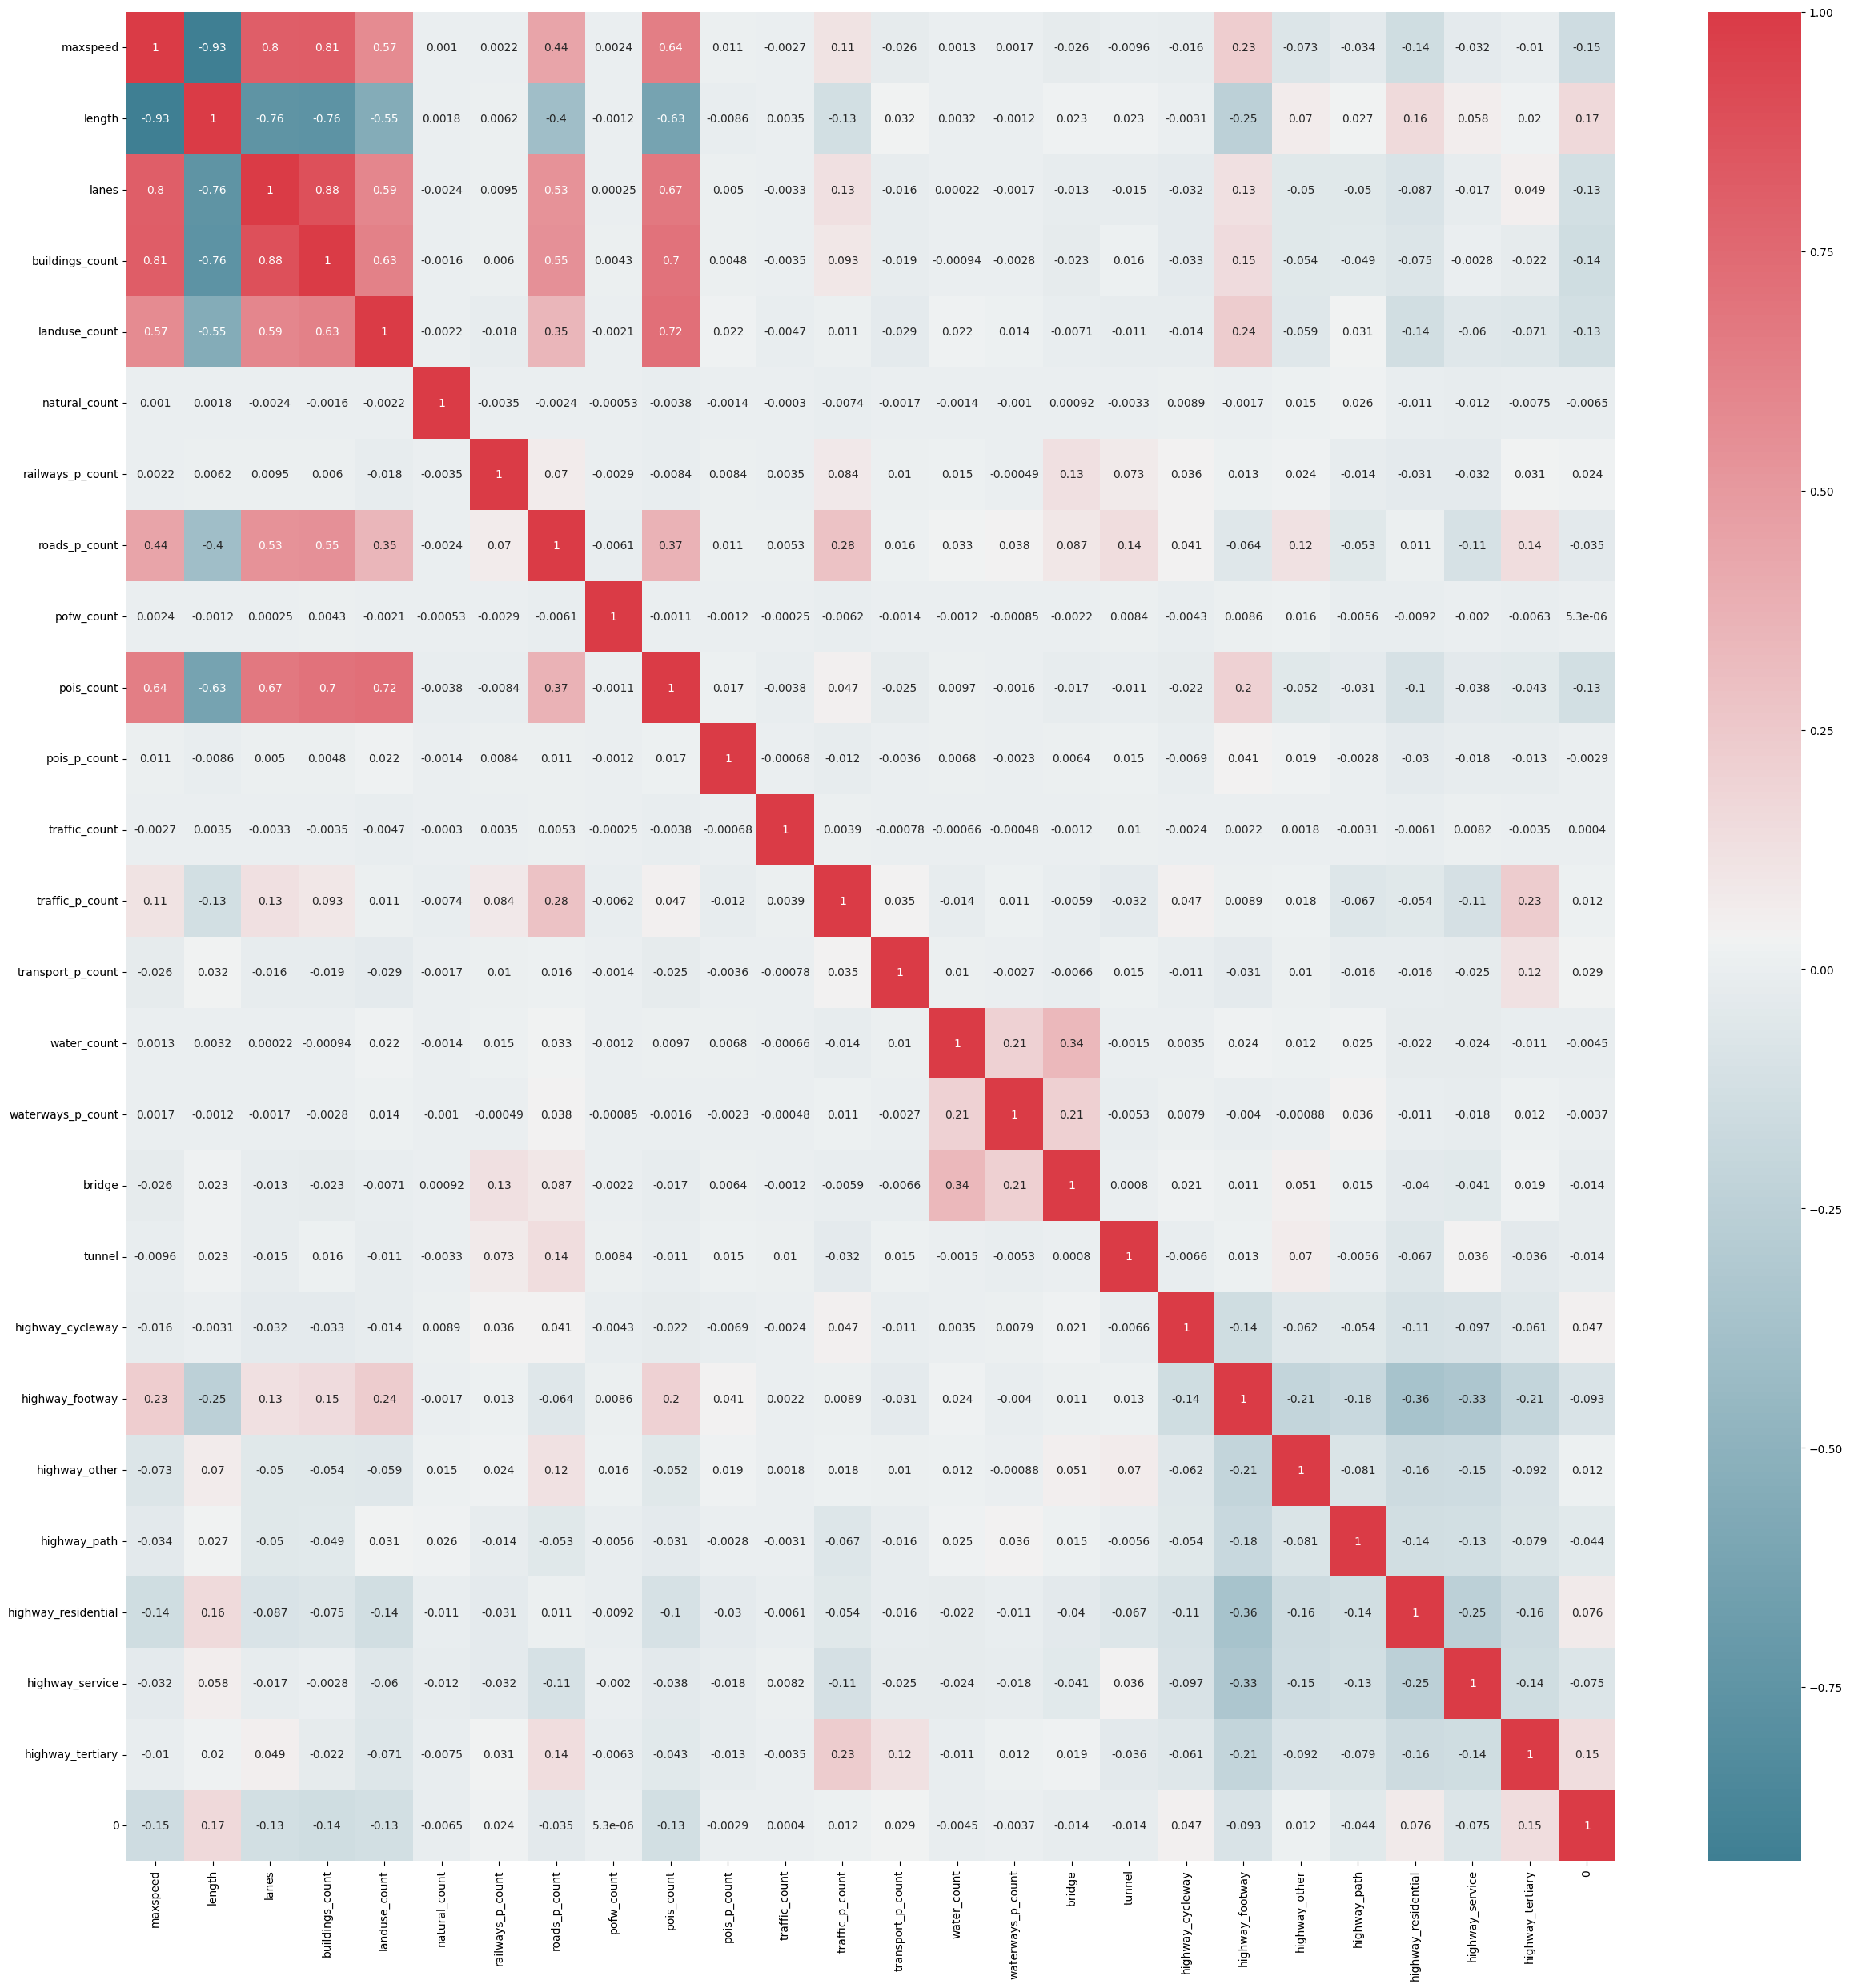

In [85]:
# run correlation matrix and plot
#f, ax = plt.subplots(figsize=(10, 8))
corr = joined.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
#            cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True))


/Users/idathrane/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


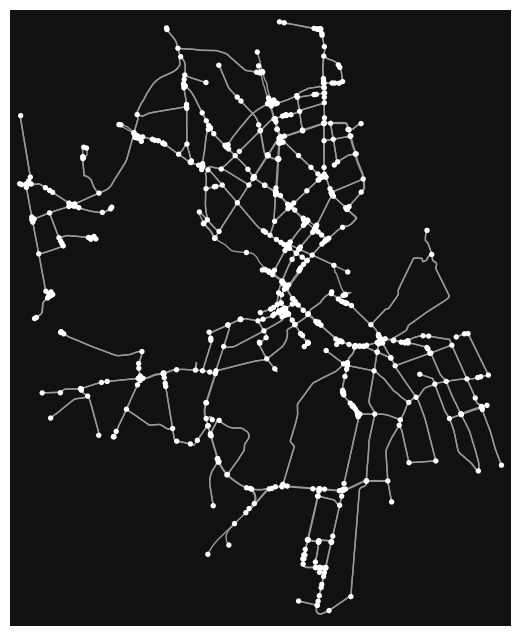

In [86]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Copenhagen Municipality', network_type='drive', custom_filter='["highway"~"tertiary"]')
fig, ax = ox.plot_graph(G)

/Users/idathrane/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


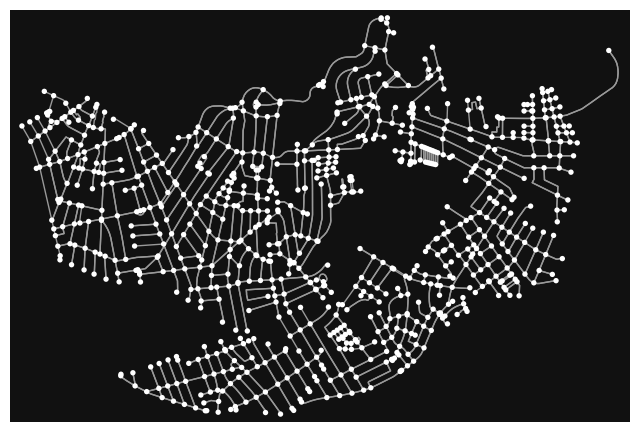

In [87]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)
G = ox.graph_from_place('Copenhagen Municipality', network_type='drive', custom_filter='["highway"~"residential"]')
fig, ax = ox.plot_graph(G)

In [148]:
G = ox.graph_from_place('Copenhagen Municipality', network_type='drive', simplify=False)

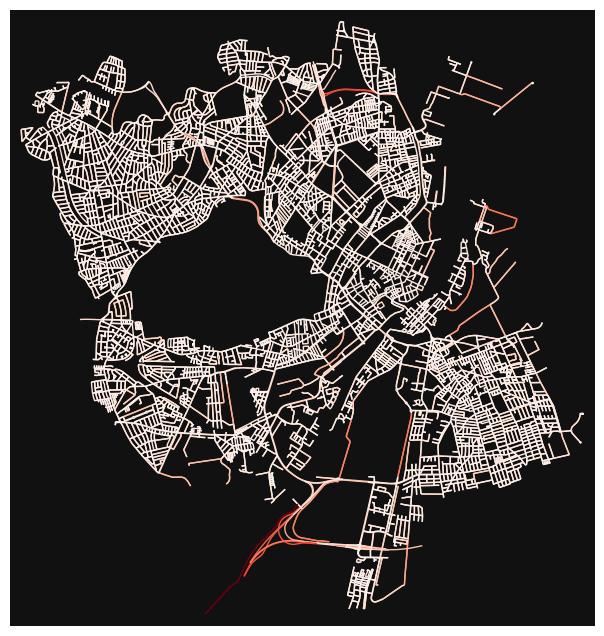

In [95]:
#Plot with edge color based on length of street
ec=ox.plot.get_edge_colors_by_attr(G, "length", cmap = "Reds")
fig, ax = ox.plot_graph(G, edge_color=ec, node_size = 0)

In [114]:
_, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


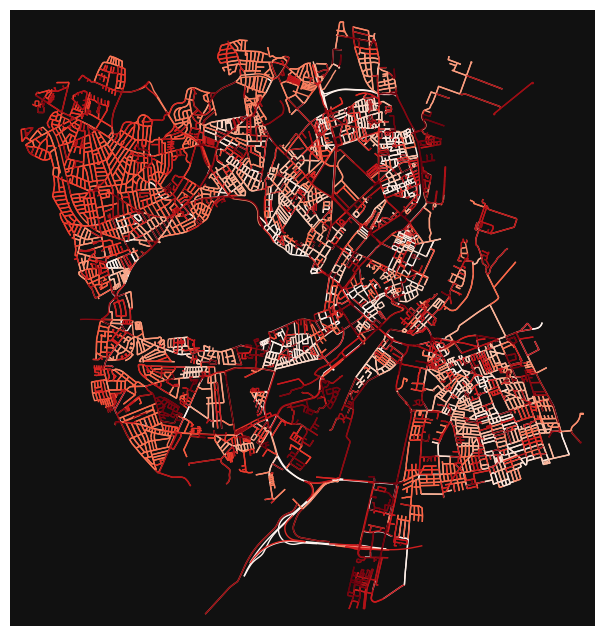

In [116]:
#Plot with edge color based on maxspeed
ec=ox.plot.get_colors(n = len(gdf_edges["maxspeed"]), cmap = "Reds")
fig, ax = ox.plot_graph(G, edge_color=ec, node_size = 0)

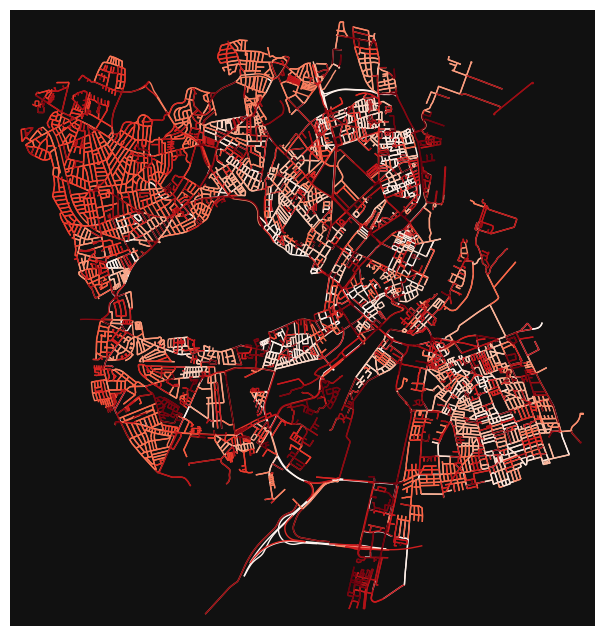

In [112]:
#Plot with edge color based on lanes
ec=ox.plot.get_colors(n = len(gdf_edges["lanes"]), cmap = "Reds")
fig, ax = ox.plot_graph(G, edge_color=ec, node_size = 0)

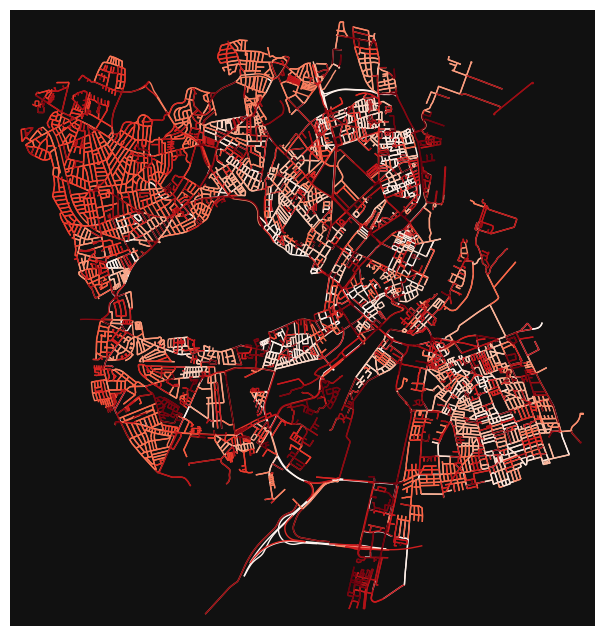

In [119]:
#Plot with edge color based on highway
ec=ox.plot.get_colors(n = len(gdf_edges["highway"]), cmap = "Reds")
fig, ax = ox.plot_graph(G, edge_color=ec, node_size = 0)

In [152]:
G = ox.graph_from_place('Copenhagen Municipality', network_type='drive', simplify=False)


/Users/idathrane/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


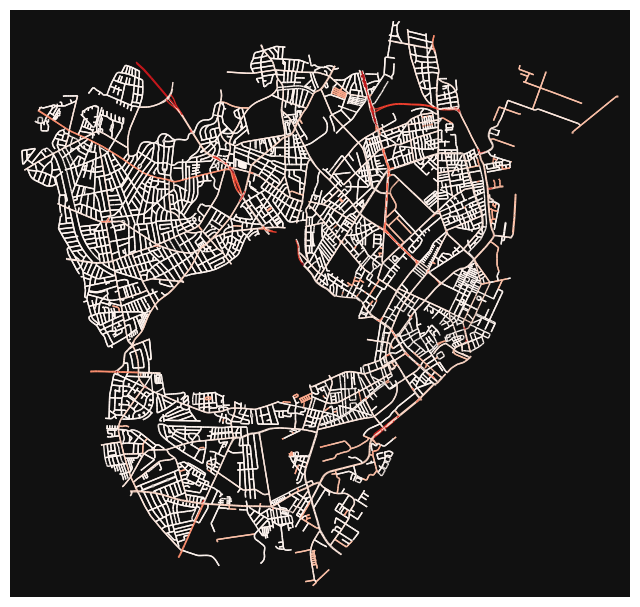

In [169]:
#Før python-koden herind

import osmnx as ox
import pandas as pd
ox.config(use_cache=True, log_console=True)

# get one color for each highway type in the graph
edges = ox.graph_to_gdfs(G, nodes=False)
edge_types = edges['highway'].value_counts()
color_list = ox.plot.get_colors(n=len(edge_types), cmap='Reds')
color_mapper = pd.Series(color_list, index=edge_types.index).to_dict()

# get the color for each edge based on its highway type
ec = [color_mapper[d['highway']] for u, v, k, d in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, edge_color=ec, node_size = False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna("").iterrows():
    text = edge["name"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()


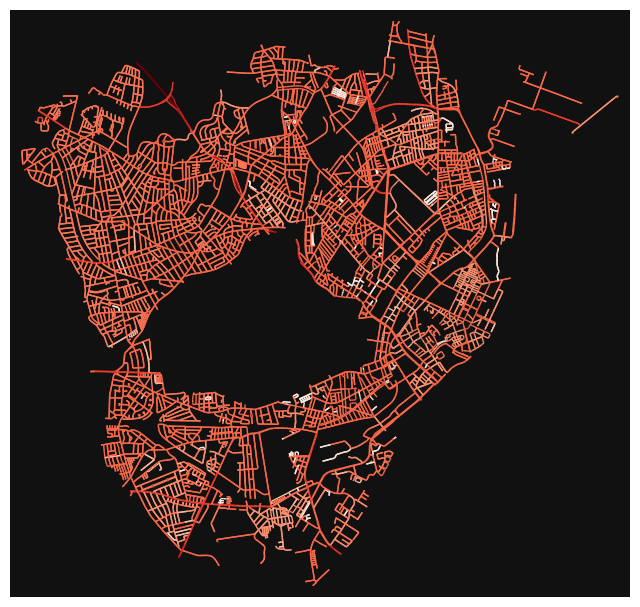

In [166]:
# get one color for each highway type in the graph
G = ox.add_edge_speeds(G)
ec = ox.plot.get_edge_colors_by_attr(G, "speed_kph", cmap='Reds')
fig, ax = ox.plot_graph(G, node_size = 0, edge_color=ec)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna("").iterrows():
    text = edge["speed_kph"]
    c = edge["geometry"].centroid
    ax.annotate(text, (c.x, c.y), c="y")
plt.show()
#fig, ax = ox.plot_graph(G, node_size = 0, edge_color=ec)

In [139]:
G.edges(keys=True, data=True)

OutMultiEdgeDataView([(118725, 298795432, 0, {'osmid': 27226011, 'oneway': True, 'name': 'Banegårdspladsen', 'highway': 'tertiary', 'maxspeed': '30', 'reversed': False, 'length': 112.872, 'geometry': <LINESTRING (12.563 55.674, 12.563 55.674, 12.564 55.673, 12.564 55.673)>}), (118725, 6357644306, 0, {'osmid': 140412993, 'oneway': True, 'lanes': '2', 'name': 'Vesterbrogade', 'highway': 'tertiary', 'maxspeed': '50', 'reversed': False, 'length': 40.497, 'geometry': <LINESTRING (12.563 55.674, 12.563 55.674, 12.563 55.674)>}), (118730, 118751, 0, {'osmid': 2371125, 'oneway': True, 'lanes': '2', 'ref': 'O2', 'name': 'Vasbygade', 'highway': 'primary', 'maxspeed': '50', 'reversed': False, 'length': 77.486, 'geometry': <LINESTRING (12.558 55.662, 12.558 55.662, 12.558 55.662, 12.558 55.662, 12....>}), (118732, 283603631, 0, {'osmid': 683463579, 'oneway': True, 'lanes': '2', 'highway': 'primary_link', 'maxspeed': '50', 'reversed': False, 'length': 8.591}), (118732, 283603631, 1, {'osmid': [2599

In [146]:
color_list

[(0.940015, 0.975158, 0.131326, 1.0),
 (0.961681, 0.914672, 0.15052, 1.0),
 (0.979644, 0.854866, 0.142453, 1.0),
 (0.991209, 0.790537, 0.149377, 1.0),
 (0.994561, 0.734791, 0.168938, 1.0),
 (0.991365, 0.675355, 0.198453, 1.0),
 (0.983041, 0.624131, 0.227937, 1.0),
 (0.968526, 0.5697, 0.261721, 1.0),
 (0.951344, 0.52285, 0.292275, 1.0),
 (0.928329, 0.472975, 0.326067, 1.0),
 (0.904601, 0.429797, 0.356329, 1.0),
 (0.875376, 0.383347, 0.389976, 1.0),
 (0.846788, 0.342551, 0.420579, 1.0),
 (0.812612, 0.297928, 0.455338, 1.0),
 (0.779604, 0.258078, 0.487539, 1.0),
 (0.740143, 0.213864, 0.524216, 1.0),
 (0.701769, 0.174005, 0.557296, 1.0),
 (0.65558, 0.129725, 0.592317, 1.0),
 (0.610667, 0.090204, 0.619951, 1.0),
 (0.557243, 0.047331, 0.643443, 1.0),
 (0.506454, 0.016333, 0.656202, 1.0),
 (0.447714, 0.00208, 0.66024, 1.0),
 (0.393304, 0.001114, 0.655199, 1.0),
 (0.331426, 0.006261, 0.641316, 1.0),
 (0.274191, 0.012109, 0.622722, 1.0),
 (0.207435, 0.017442, 0.596333, 1.0),
 (0.140603, 0.02168

In [147]:
edge_types.index

Index([                                       'residential',
                                                 'tertiary',
                                                  'primary',
                                             'unclassified',
                                            'living_street',
                                            'tertiary_link',
                                                'secondary',
                           ['residential', 'living_street'],
                                                   'busway',
                                             'primary_link',
                            ['unclassified', 'residential'],
                                            'motorway_link',
                                                 'motorway',
                                           'secondary_link',
                                ['residential', 'tertiary'],
                               ['unclassified', 'tertiary'],
                ['unclas